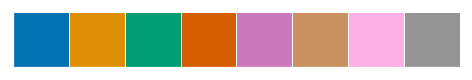

In [40]:
%matplotlib inline
import os
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')

import astropy.units as units
from brewer2mpl import qualitative, diverging
#import cufflinks as cf
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#import h5py
#from IPython.display import HTML
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import cm as cm2
import numpy as np
import palettable as colortable
from palettable.cartocolors.diverging import Earth_3, Tropic_3_r, Tropic_3
from palettable.colorbrewer.diverging import PuOr_3, RdBu_11
from palettable.colorbrewer.sequential import BuGn_9, Blues_9
from palettable.cmocean.diverging import Balance_9
import pandas as pd
import pytz
import seaborn as sns
import xarray as xr


sns.set()
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'


pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("whitegrid", {'axes.grid':True, 'ticks':True})
plt.style.use("seaborn-paper")
sns.set_context('paper')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
paper_path = os.path.join(os.environ['HOME'], 'Work', 'Paper', '2018', 'Hector')
date_fmt = mdates.DateFormatter('%b %d')
pal

In [22]:
UM133ens = xr.open_dataset('rain_rate_um133.nc')
UM044ens = xr.open_dataset('rain_rate_um044.nc')
OBS = xr.open_dataset('rain_rate_observation.nc')

In [10]:
lat1, lon1 = OBS.variables['latitude'][:], OBS.variables['longitude'][:]
lat2, lon2 = UM044ens.coords['lat'][:], UM044ens.coords['lon'][:]
m2 = Basemap(llcrnrlat=min(lat2), llcrnrlon=min(lon2), urcrnrlat=max(lat2), urcrnrlon=max(lon2), 
              resolution='f', area_thresh=1)


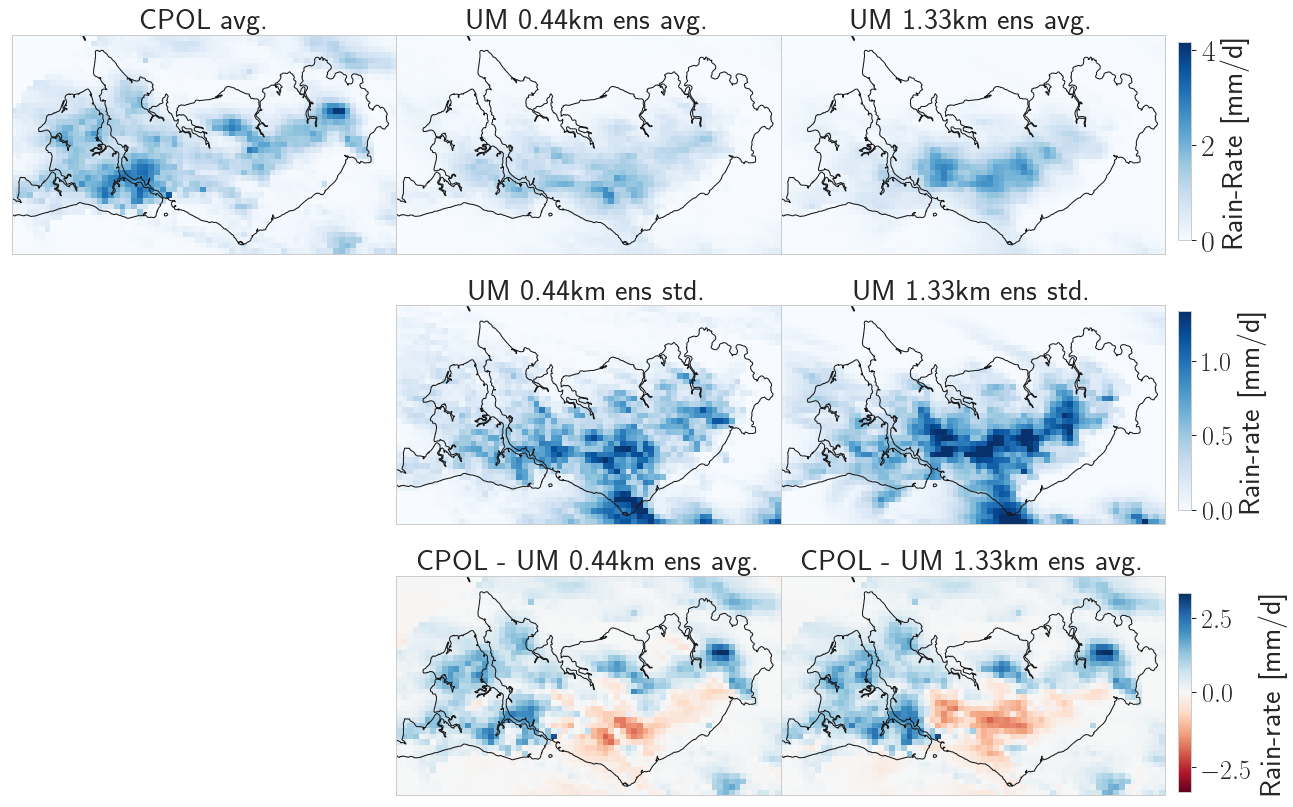

In [41]:
#Plet the avg maps for comparison
fig = plt.figure(figsize=(18,12))
#sns.set_style("darkgrid", {'axes.grid':True, 'ticks':True})
UM_2 = UM133ens.groupby('t.day').sum(dim='t').mean(dim='day')
UM_1 = UM044ens.groupby('t.day').sum(dim='t').mean(dim='day')
obs = OBS.groupby('t.day').sum(dim='t').mean(dim='day')
colm = Blues_9.mpl_colormap
colm.set_under('w', alpha=0)
tsteps = pd.DatetimeIndex(OBS.coords['t'].values).tz_localize(utc).tz_convert(timezone).to_pydatetime()
obs_data = np.ma.masked_less(obs.variables['lsrain'][:].values, -0.01)
data = [obs_data[1:-1]/6,
        np.ma.masked_less(UM_1.variables['lsrain'][:].values, -0.01).mean(axis=0)[0]/6,
        np.ma.masked_less(UM_2.variables['lsrain'][:].values, -0.01).mean(axis=0)[0]/6,
        None,
        np.ma.masked_less(UM_1.variables['lsrain'][:].values/6, -0.01).std(axis=0)[0],
        np.ma.masked_less(UM_2.variables['lsrain'][:].values/6, -0.01).std(axis=0)[0]
       ]

data.append(None)

data.append(data[0] - data[1])
data.append(data[0] - data[2])
UM_1min = np.ma.masked_less(UM_1.variables['lsrain'][:].values, -0.01).min(axis=0)[0]
UM_2min = np.ma.masked_less(UM_2.variables['lsrain'][:].values, -0.01).min(axis=0)[0]

UM_1max = np.ma.masked_less(UM_1.variables['lsrain'][:].values, -0.01).max(axis=0)[0]
UM_2max = np.ma.masked_less(UM_2.variables['lsrain'][:].values, -0.01).max(axis=0)[0]

#data.append(None)
#data.append(UM_1max - UM_1min)
#data.append(UM_1max - UM_1min)

ax = [fig.add_subplot(3,3,1)]
#m[0].pcolormesh(topolon, topolat, ls.hillshade(topo[:], vert_exag=1), cmap='gray', ax=ax[0])
im = [m2.pcolormesh(lon1, lat1, obs_data/6,vmin=0.0,vmax=25/6,cmap=colm)]
m2.drawcoastlines()
#cbar_ax = fig.add_axes([0.14, 0.33, 0.74, 0.01])
#cbar=fig.colorbar(im[-1], cax=cbar_ax, orientation='horizontal')
#cbar.ax.tick_params(labelsize=24)
#cbar.set_label('Avg. Rain-rate [mm/d]',size=24)
tit = ['CPOL avg.', 'UM 0.44km ens avg.', 'UM 1.33km ens avg.',
       None, 'UM 0.44km ens std.', 'UM 1.33km ens std.',
       None, 'CPOL - UM 0.44km ens avg.' ,'CPOL - UM 1.33km ens avg.',
       None, 'UM 0.44 ens range', 'UM 1.33km ens range']
colors = {1:colm, 2:colm, 4:colm, 5:colm,
          7:RdBu_11.mpl_colormap, 8:RdBu_11.mpl_colormap,
         10:colm, 11:colm}
Range = {1:(0.0, 25/6), 2:(0.0, 25/6), 4:(0,8/6), 5:(0,8/6), 7:(-20/6,20/6), 8:(-20/6,20/6), 10:(0,30/6), 11:(0,30/6)}
height = {2:0.682, 5:0.37, 8:0.044, 11:0.05}
ax[-1].set_title('CPOL avg.', fontsize=fontsize)
cbar_ax = [fig.add_axes([0.91, height[2], 0.01, 0.23])]
cbar = [fig.colorbar(im[-1], cax=cbar_ax[-1], orientation='vertical')]
cbar[-1].ax.tick_params(labelsize=fontsize)
cbar[-1].set_label('Rain-Rate [mm/d]',size=fontsize)
for i in range(1,len(data)):
    if data[i] is not None:
        ax.append(fig.add_subplot(3,3,i+1))
            #m[-1].shadedrelief()
        im.append(m2.pcolormesh(lon2, lat2, data[i],vmin=Range[i][0],vmax=Range[i][1],cmap=colors[i]))
        m2.drawcoastlines()
        ax[-1].set_title(tit[i],fontsize=fontsize)
        if i in (5, 8, 11):
            cbar_ax.append(fig.add_axes([0.91, height[i], 0.01, 0.23]))
            cbar.append(fig.colorbar(im[-1], cax=cbar_ax[-1], orientation='vertical'))
            cbar[-1].ax.tick_params(labelsize=fontsize-4)
            cbar[-1].set_label('Rain-rate [mm/d]',size=fontsize)
fig.subplots_adjust(right=0.9, bottom=0.01, top=0.95,left=0.01, hspace=0.0, wspace=0)
fig.savefig(os.path.join(paper_path, 'Figure_04.pdf'), bbox_set_inches='tight', dpi=300)

In [36]:
data = np.array([data[0].mean(), data[1].mean(), data[2].mean(), data[-2].mean(), data[-1].mean()])
data = data[np.newaxis,:]
pd.DataFrame(data,
             columns=['CPOL', 'UM044', 'UM133', 'CPOL-UM044', 'CPOL-UM133'])

,CPOL,UM044,UM133,CPOL-UM044,CPOL-UM133
0,0.582676,0.277772,0.274143,0.304904,0.308533
